### 배깅bagging기반 분류기
+ 어려운 연주곡은 한 명의 중급 연주자보다 두세 명의 초보 연주자가 나눠 연주하는 것이 유리하다
+ bootstrap + aggregation
    - 한 가지 분류 모델을 여러 개 만들어서 서로 다른 학습 데이터로 학습시킨 후(bootstrap) 
    - 한 테스트 데이터에 대한 서로 다른 예측값들을 투표로 통해(aggregating) 가장 높은 예측값으로 최종 결론을 내리는 기법
    - sklearn에서 BaggingClassifier를 제공

<img src= 'img/bagging.png'>

### bootstrap
+ 배깅은 하나의 알고리즘을 사용하지만 학습 데이터셋을 랜덤하게 추출하여 모델(분류기)을 각각 다르게 학습시키는 방법
+ 학습데이터 추출 때 중복을 허용하는 것
+ 데이터에 편향성이 생겨 모델이 과적합되는 것을 막을 수 있음

### 랜덤포레스트
+ 앙상블 알고리즘 중 배깅을 적용해서 만든 머신러닝 알고리즘


<img src= 'img/rforest.png'>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mldlpy3

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.

In [5]:
X, y = make_blobs(n_samples=350, centers=4, random_state=2111111715, cluster_std=1.0)

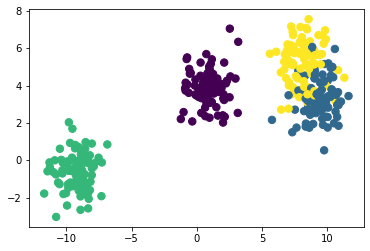

In [6]:
plt.scatter(X[:,0], X[:,1], c=y, s=55)

In [7]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, stratify = y, random_state=2111111715)

### BaggingClassifier(분류기, 옵션)
+ #### n_estimators : 배깅시 사용할 분류기 수 지정
+ #### max_samples : 배깅시 사용할 표본 개수
+ #### bootstrap : 표본 추출시 중복 허용여부 지정
+ #### n_jobs : 작업시 사용할 cpu 코어수 (-1이 최대)

In [51]:
bgcf = BaggingClassifier(LogisticRegression(max_iter=1000), n_estimators=300, max_samples=175, bootstrap=True, n_jobs=-1)

In [52]:
bgcf.fit(Xtrain, ytrain)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000),
                  max_samples=175, n_estimators=300, n_jobs=-1)

In [53]:
pred = bgcf.predict(Xtest)

In [54]:
print(bgcf.score(Xtrain, ytrain), accuracy_score(ytest, pred))

0.9346938775510204 0.8857142857142857


/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


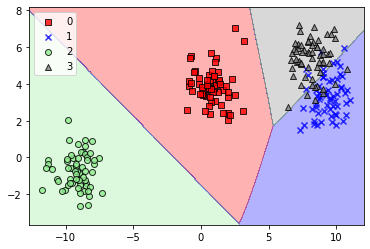

In [55]:
mldlpy3.plot_decision_regions(Xtrain, ytrain, bgcf)

#### 분류기 1개 수행시 결과

In [24]:
lr = LogisticRegression(max_iter=1000)

In [25]:
lr.fit(Xtrain, ytrain)

LogisticRegression(max_iter=1000)

In [26]:
pred = bgcf.predict(Xtest)

In [27]:
print(bgcf.score(Xtrain, ytrain), accuracy_score(ytest, pred))

0.9346938775510204 0.8857142857142857


/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


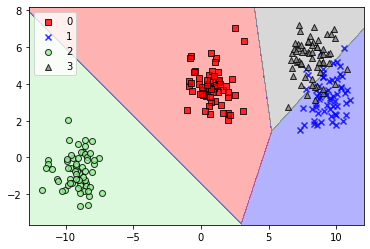

In [28]:
mldlpy3.plot_decision_regions(Xtrain, ytrain, lr)

### kneighbor 분류기 적용

In [56]:
bgcf = BaggingClassifier(KNeighborsClassifier(), n_estimators=300, max_samples=175, bootstrap=True)

In [57]:
bgcf.fit(Xtrain, ytrain)

BaggingClassifier(base_estimator=KNeighborsClassifier(), max_samples=175,
                  n_estimators=300)

In [58]:
pred = bgcf.predict(Xtest)

In [59]:
print(bgcf.score(Xtrain, ytrain), accuracy_score(ytest, pred))

0.9510204081632653 0.9047619047619048


/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


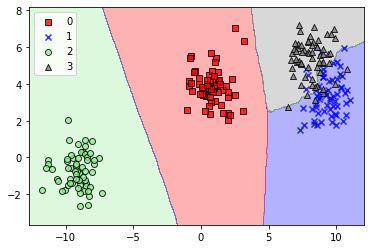

In [60]:
mldlpy3.plot_decision_regions(Xtrain, ytrain, bgcf)

In [35]:
kcf = KNeighborsClassifier()

In [36]:
kcf.fit(Xtrain, ytrain)

KNeighborsClassifier()

In [37]:
pred = kcf.predict(Xtest)

In [38]:
print(kcf.score(Xtrain, ytrain), accuracy_score(ytest, pred))

0.9469387755102041 0.9142857142857143


/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


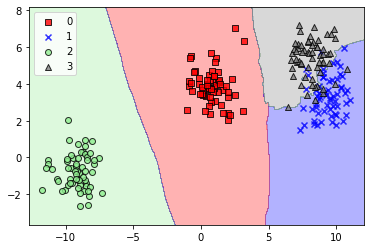

In [39]:
mldlpy3.plot_decision_regions(Xtrain, ytrain, kcf)

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dcf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=300, max_samples=175, bootstrap=True)

In [42]:
dcf.fit(Xtrain, ytrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=175,
                  n_estimators=300)

In [43]:
pred = dcf.predict(Xtest)

In [44]:
print(dcf.score(Xtrain, ytrain), accuracy_score(ytest, pred))

0.9918367346938776 0.9047619047619048


/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


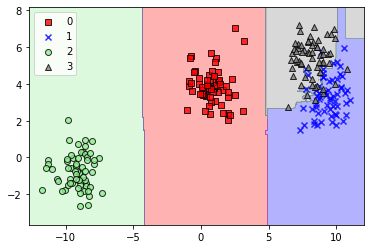

In [45]:
mldlpy3.plot_decision_regions(Xtrain, ytrain, dcf)

In [46]:
dcf2 =DecisionTreeClassifier()

In [47]:
dcf2.fit(Xtrain, ytrain)

DecisionTreeClassifier()

In [48]:
pred = dcf2.predict(Xtest)

In [49]:
print(dcf2.score(Xtrain, ytrain), accuracy_score(ytest, pred))

1.0 0.8952380952380953


/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


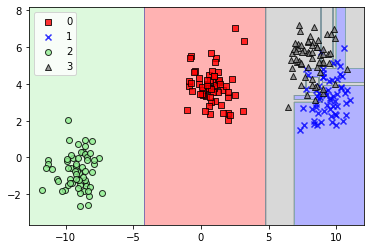

In [50]:
mldlpy3.plot_decision_regions(Xtrain, ytrain, dcf2)

In [78]:
svcf = BaggingClassifier(SVC(), n_estimators=30, max_samples=175, bootstrap=True, n_jobs=-1)

In [79]:
svcf.fit(Xtrain, ytrain)

BaggingClassifier(base_estimator=SVC(), max_samples=175, n_estimators=30,
                  n_jobs=-1)

In [80]:
pred = svcf.predict(Xtest)

In [81]:
print(svcf.score(Xtrain, ytrain), accuracy_score(ytest, pred))

0.926530612244898 0.9047619047619048


In [ ]:
mldlpy3.plot_decision_regions(Xtrain, ytrain, svcf)

In [73]:
svcf2 = SVC()

In [74]:
svcf2.fit(Xtrain, ytrain)

SVC()

In [75]:
pred = svcf2.predict(Xtest)

In [76]:
print(svcf2.score(Xtrain, ytrain), accuracy_score(ytest, pred))

0.9387755102040817 0.9047619047619048


/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


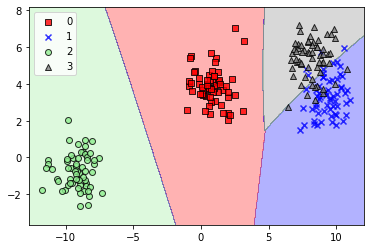

In [77]:
mldlpy3.plot_decision_regions(Xtrain, ytrain, svcf2)